# Airline Analysis Project

In this project, I'll imagine that I work for a travel agency and need to know the ins and outs of airline prices for my clients. I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.

I decide to look into my favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In order to get the plots to appear correctly in the notebook, I'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight


,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


In [2]:
# Preview the first few rows of the data
flight.head()


,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [3]:
# Task 1 Summarize Data
flight.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [4]:
# Task 2 Change all dtype from object to categorical
flight['inflight_meal'] = flight['inflight_meal'].astype('category')
flight['inflight_entertainment'] = flight['inflight_entertainment'].astype('category') 
flight['inflight_wifi'] = flight['inflight_wifi'].astype('category') 
flight['day_of_week']= flight['day_of_week'].astype('category') 
flight['redeye'] = flight['redeye'].astype('category') 
flight['weekend']= flight['weekend'].astype('category')


In [5]:
# Task 3 Summarize Data
flight.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   miles                   129780 non-null  int64   
 1   passengers              129780 non-null  int64   
 2   delay                   129780 non-null  int64   
 3   inflight_meal           129780 non-null  category
 4   inflight_entertainment  129780 non-null  category
 5   inflight_wifi           129780 non-null  category
 6   day_of_week             129780 non-null  category
 7   redeye                  129780 non-null  category
 8   weekend                 129780 non-null  category
 9   coach_price             129780 non-null  float64 
 10  firstclass_price        129780 non-null  float64 
 11  hours                   129780 non-null  int64   
dtypes: category(6), float64(2), int64(4)
memory usage: 6.7 MB


In [6]:
# Task 4 Count minimum numbers of passengers
flight['passengers'].min()


135

In [7]:
# Task 5 Count maximum numbers of passengers
flight['passengers'].max()


244

In [8]:
# Task 6 Count average numbers of passengers
flight['passengers'].mean()


207.7231545692711

In [9]:
# Task 7 Count inflight meals 
flight['inflight_meal'].value_counts()


No     90813
Yes    38967
Name: inflight_meal, dtype: int64

In [10]:
# Task 8 Count inflight entertainment 
flight['inflight_entertainment'].value_counts()


Yes    104028
No      25752
Name: inflight_entertainment, dtype: int64

In [11]:
# Task 9 Count inflight wifi
flight['inflight_wifi'].value_counts()


Yes    116766
No      13014
Name: inflight_wifi, dtype: int64

In [12]:
# Task 10 Count day of week for flights
flight['day_of_week'].value_counts()


Saturday     33736
Sunday       28298
Friday       22609
Monday       14065
Tuesday      11391
Wednesday    11221
Thursday      8460
Name: day_of_week, dtype: int64

In [13]:
# Task 11 Count overnight flight
flight['redeye'].value_counts()


No     123334
Yes      6446
Name: redeye, dtype: int64

In [14]:
# Task 12 Count weekend flights
flight['weekend'].value_counts()


Yes    84643
No     45137
Name: weekend, dtype: int64

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [15]:
# Task 13
print(np.mean(flight.coach_price))


376.58525308213905


In [16]:
print(np.median(flight.coach_price))


380.56


In [17]:
print(np.max(flight.coach_price))


593.635


In [18]:
print(np.min(flight.coach_price))


44.415


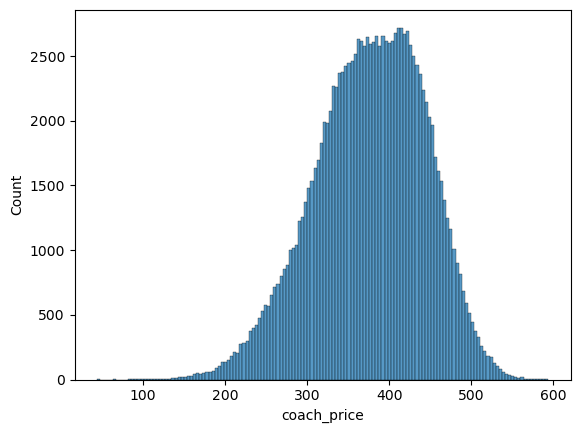

<Figure size 640x480 with 0 Axes>

In [19]:
sns.histplot(flight.coach_price)
plt.show()
plt.clf()


In [20]:
## Task 14
print(np.mean(flight.coach_price[flight.hours == 8]))


431.834377372817


In [21]:
print(np.median(flight.coach_price[flight.hours == 8]))


437.115


In [22]:
print(np.max(flight.coach_price))


593.635


In [23]:
print(np.min(flight.coach_price))


44.415


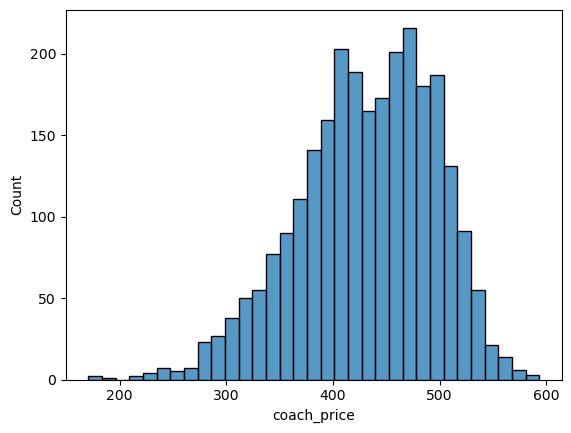

<Figure size 640x480 with 0 Axes>

In [24]:
sns.histplot(flight.coach_price[flight.hours == 8])

plt.show()
plt.clf()


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

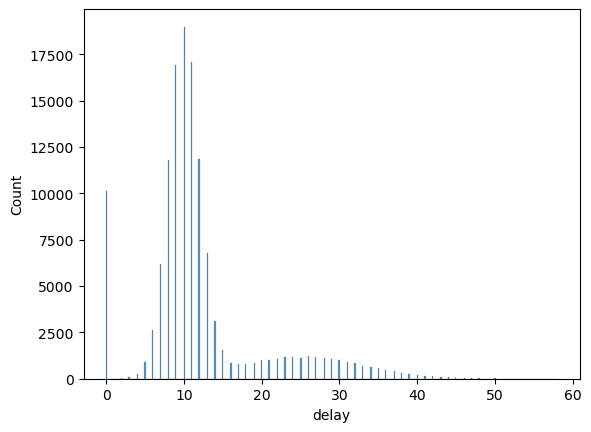

<Figure size 640x480 with 0 Axes>

In [25]:
## Task 15
sns.histplot(flight.delay[flight.delay <= 500])
plt.show()
plt.clf()


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

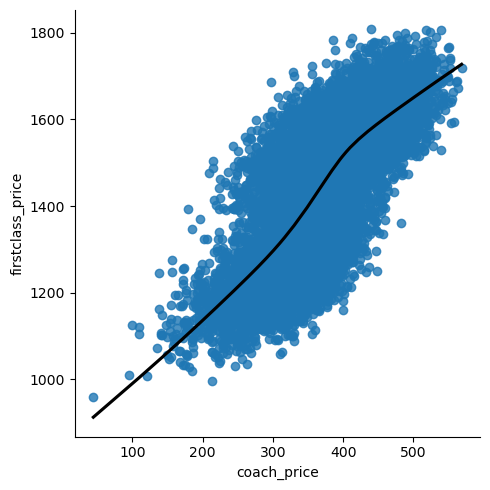

<Figure size 640x480 with 0 Axes>

In [26]:
## Task 16
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

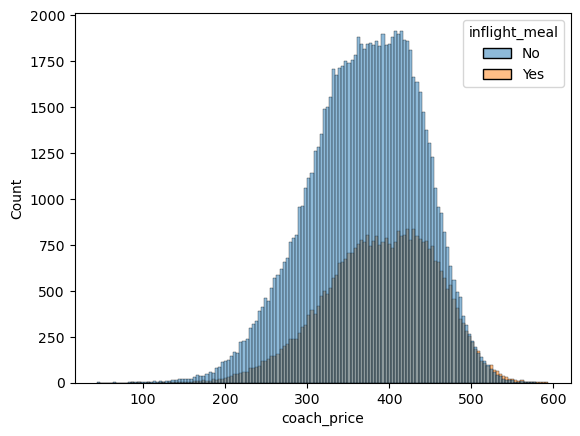

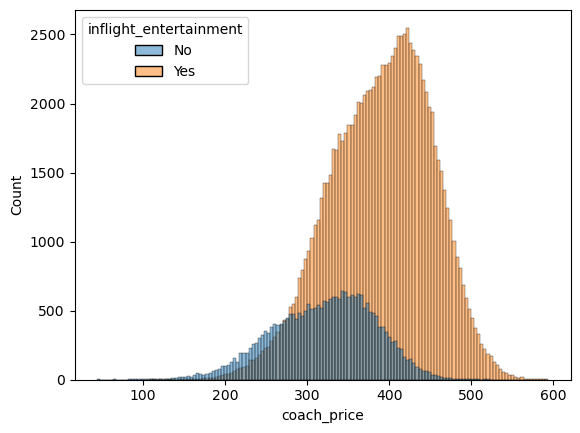

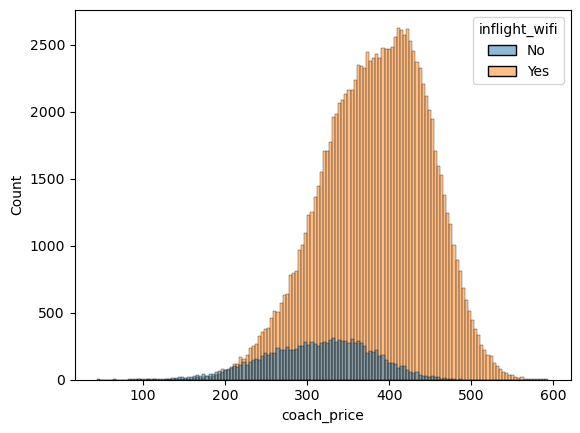

<Figure size 640x480 with 0 Axes>

In [27]:
## Task 17
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

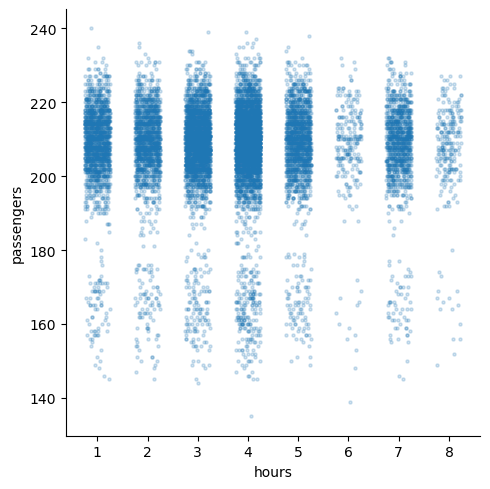

<Figure size 640x480 with 0 Axes>

In [28]:
## Task 18
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, 
           fit_reg = False)
plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

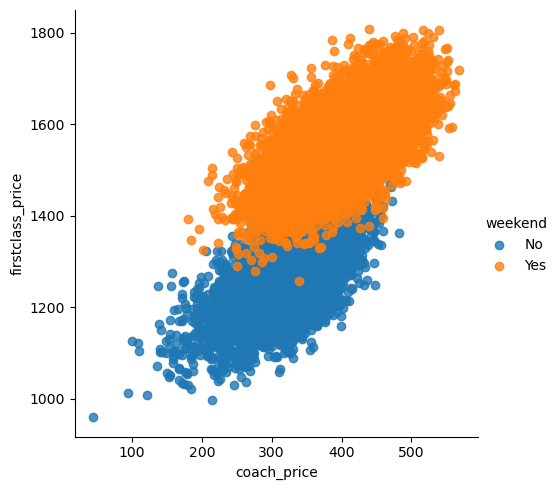

<Figure size 640x480 with 0 Axes>

In [29]:
## Task 19
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

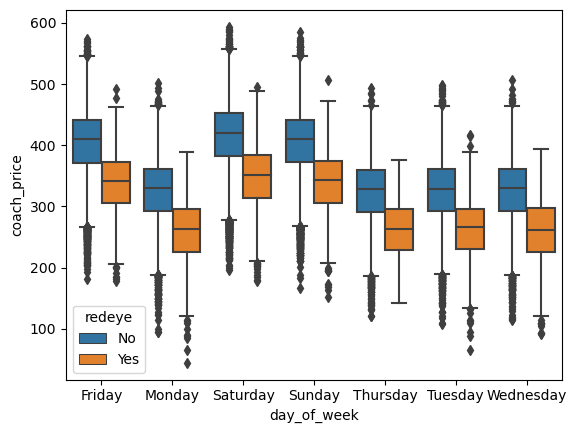

<Figure size 640x480 with 0 Axes>

In [30]:
## Task 20
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()
